In [21]:
import pandas as pd 
import calendar
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

%reload_ext autoreload
%autoreload 2
from scipy.stats import linregress

# READ CSV FILE

In [22]:
df= pd.read_csv('owid-covid-data.csv')

PARSING DATE

In [23]:
df['date'] = pd.to_datetime(df['date'],errors='coerce')

In [24]:
df['month']= df['date'].dt.month
x=[]
for i in df['month']:
  x.append(calendar.month_name[i])
df['month']=x

In [25]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

# SELECTING COLUMNS

In [26]:
df1=df[['continent', 'location', 'date', 'total_cases', 'new_cases','total_deaths', 'new_deaths','total_tests','people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations','stringency_index',
       'population','gdp_per_capita','life_expectancy', 'human_development_index','month']]

new dataframe

In [27]:
df1

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,population,gdp_per_capita,life_expectancy,human_development_index,month
0,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,1803.987,64.83,0.511,February
1,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,1803.987,64.83,0.511,February
2,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,1803.987,64.83,0.511,February
3,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,1803.987,64.83,0.511,February
4,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,1803.987,64.83,0.511,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98005,Africa,Zimbabwe,2021-06-20,41779.0,151.0,1672.0,6.0,NaN,703065.0,435668.0,4813.0,67.59,14862927.0,1899.775,61.49,0.571,June
98006,Africa,Zimbabwe,2021-06-21,42195.0,416.0,1685.0,13.0,NaN,704001.0,436851.0,2119.0,67.59,14862927.0,1899.775,61.49,0.571,June
98007,Africa,Zimbabwe,2021-06-22,42714.0,519.0,1691.0,6.0,NaN,706158.0,440220.0,5526.0,NaN,14862927.0,1899.775,61.49,0.571,June
98008,Africa,Zimbabwe,2021-06-23,43480.0,766.0,1692.0,1.0,NaN,715056.0,451793.0,20471.0,NaN,14862927.0,1899.775,61.49,0.571,June


In [33]:
df1=df1.dropna(axis=0,thresh=14).reset_index()

In [38]:
df1.drop(columns='index',inplace=True)

KeyError: ignored

DESCRIBE 


In [39]:
df1.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_tests,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,population,gdp_per_capita,life_expectancy,human_development_index
count,4.321700e+04,43216.000000,4.319900e+04,43199.000000,3.952100e+04,1.266300e+04,1.018100e+04,1.128300e+04,41875.000000,4.321700e+04,42933.000000,43217.000000,43101.000000
mean,1.171124e+06,5841.759695,2.693105e+04,124.575824,8.243971e+06,1.151464e+07,6.508897e+06,4.673280e+05,62.673990,8.645922e+07,24288.042242,75.257908,0.779265
std,8.972533e+06,40402.393933,1.957933e+05,811.544979,3.448601e+07,7.839972e+07,4.103221e+07,2.758621e+06,16.838295,5.243188e+08,21134.097842,6.609995,0.135170
min,1.000000e+00,-74347.000000,1.000000e+00,-117.000000,2.300000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,3.393800e+04,661.240000,53.280000,0.394000
25%,8.709000e+03,48.000000,1.340000e+02,0.000000,2.245030e+05,1.297110e+05,6.150400e+04,4.943500e+03,50.930000,4.822233e+06,7824.362000,71.780000,0.709000
50%,6.815300e+04,410.000000,1.011000e+03,5.000000,9.786000e+05,6.314850e+05,3.706770e+05,2.276300e+04,63.890000,1.167303e+07,18933.907000,76.680000,0.810000
75%,3.265850e+05,1785.000000,7.391500e+03,37.000000,3.847922e+06,2.700162e+06,1.578894e+06,9.868350e+04,75.460000,4.519578e+07,35220.084000,80.900000,0.890000
max,1.799994e+08,906008.000000,3.900372e+06,18050.000000,4.618625e+08,1.758402e+09,8.055830e+08,4.675788e+07,100.000000,7.794799e+09,116935.600000,84.970000,0.957000


In [40]:
df1.groupby('continent').describe()

total_cases                              ... human_development_index              
                    count          mean           std  ...                     50%    75%    max
continent                                              ...                                      
Africa             7334.0  9.944485e+04  2.603012e+05  ...                   0.543  0.611  0.804
Asia              11372.0  6.345483e+05  2.396156e+06  ...                   0.782  0.852  0.949
Europe            14776.0  4.829324e+05  1.015084e+06  ...                   0.888  0.931  0.957
North America      4678.0  1.698806e+06  5.879895e+06  ...                   0.796  0.815  0.929
Oceania            1112.0  8.419673e+03  1.134188e+04  ...                   0.931  0.944  0.944
South America      3765.0  1.060666e+06  2.554502e+06  ...                   0.767  0.817  0.851

[6 rows x 104 columns]

### adding year column

In [42]:
df1['year']=df['date'].dt.year

In [46]:
df1.groupby(['year','month']).sum()

total_cases  ...  human_development_index
year month                    ...                         
2020 April      7.020900e+09  ...                 2637.519
     August     3.898653e+08  ...                 1475.930
     December   9.134900e+08  ...                 1180.628
     February   4.032617e+09  ...                 1094.426
     January    3.762184e+09  ...                 1212.555
     July       2.692073e+08  ...                 1640.121
     June       3.136775e+09  ...                 2854.196
     March      5.048759e+09  ...                 1540.276
     May        7.552593e+09  ...                 3127.925
     November   3.250767e+08  ...                 1225.053
     October    2.349923e+08  ...                 1292.125
     September  5.188986e+08  ...                 1347.622
2021 April      1.134732e+09  ...                 1784.652
     August     1.322744e+08  ...                  692.337
     December   1.246843e+09  ...                  946.032
     February   1.846158e+09  ...                 1106.393
     January    1.742504e+09  ...                 1107.210
     July       5.967421e+07  ...                  462.848
     June       5.058794e+09  ...                 1170.835
     March      2.127813e+09  ...                 1633.099
     May        2.273802e+09  ...                 1629.734
     November   9.174634e+08  ...                  845.108
     October    6.959293e+08  ...                  854.721
     September  1.711153e+08  ...                  725.756

[24 rows x 13 columns]

# info

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43217 entries, 0 to 43216
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   continent                43037 non-null  object        
 1   location                 43217 non-null  object        
 2   date                     43217 non-null  datetime64[ns]
 3   total_cases              43217 non-null  float64       
 4   new_cases                43216 non-null  float64       
 5   total_deaths             43199 non-null  float64       
 6   new_deaths               43199 non-null  float64       
 7   total_tests              39521 non-null  float64       
 8   people_vaccinated        12663 non-null  float64       
 9   people_fully_vaccinated  10181 non-null  float64       
 10  new_vaccinations         11283 non-null  float64       
 11  stringency_index         41875 non-null  float64       
 12  population               43217 n

# ***PLOT***

top 10 and lowest 10 country caseswise

In [125]:
top.columns

Index(['location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'total_tests', 'people_vaccinated', 'people_fully_vaccinated',
       'new_vaccinations', 'stringency_index', 'population', 'gdp_per_capita',
       'life_expectancy', 'human_development_index', 'year'],
      dtype='object')

In [81]:
top

,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,population,gdp_per_capita,life_expectancy,human_development_index,year
1,United States,6.917546e+09,33590456.0,139185207.0,603177.0,8.861971e+10,1.623320e+10,1.109878e+10,306642957.0,30433.50,1.592123e+11,2.608244e+07,37931.66,445.406,971795
2,India,3.978423e+09,30100886.0,53781421.0,392750.0,5.845862e+10,1.301492e+10,2.900361e+09,287686541.0,34314.39,6.292820e+11,2.930563e+06,31764.96,294.120,921295
3,Brazil,1.874882e+09,9192043.0,49561361.0,276380.0,8.262144e+07,3.029794e+09,1.223969e+09,74725973.0,10564.82,3.358439e+10,2.228345e+06,11989.04,120.870,319172
4,Russia,1.014973e+09,5128068.0,20613705.0,123194.0,2.794718e+10,1.263205e+09,8.501406e+08,28225534.0,23729.39,6.523270e+10,1.107038e+07,32443.26,368.328,903189
5,United Kingdom,8.972753e+08,4649705.0,32122438.0,126238.0,2.537013e+10,4.423974e+09,1.682297e+09,72886459.0,31799.68,3.054870e+10,1.788896e+07,36594.00,419.400,909175
6,France,7.922949e+08,3560563.0,16294827.0,48246.0,0.000000e+00,1.897161e+09,8.027676e+08,48988323.0,11232.54,1.195887e+10,6.833204e+06,14630.82,159.477,357655
7,Turkey,7.555129e+08,4566394.0,8087438.0,49122.0,9.122363e+09,1.675885e+09,1.042040e+09,45535137.0,30456.57,3.828994e+10,1.140872e+07,35271.26,372.280,917240
8,Italy,7.469324e+08,4255545.0,29298674.0,127359.0,1.107666e+10,1.837327e+09,8.602160e+08,48309654.0,34561.82,2.944491e+10,1.715218e+07,40669.37,434.404,983914
9,Argentina,6.108834e+08,4350556.0,14311201.0,91438.0,1.704564e+09,7.819183e+08,1.814934e+08,18447722.0,39027.21,2.142280e+10,8.974672e+06,36341.58,400.530,957655
10,Colombia,6.073293e+08,3994757.0,16326104.0,100936.0,2.983103e+09,3.623345e+08,1.629979e+08,10686148.0,29396.88,1.964079e+10,5.116410e+06,29833.94,296.062,779895


In [101]:
top=df1.groupby('location').sum().sort_values('total_cases',ascending=False).head(11).reset_index()
top=top[1:]
toploc=[]
for c in top['location']:
  a=df1[df1['location']==c][['total_cases']].max()
  toploc.append(a)

topcases=top['location']


  
 



In [100]:
toploc

[total_cases    33590481.0
 dtype: float64, total_cases    30134445.0
 dtype: float64, total_cases    18243483.0
 dtype: float64, total_cases    5325940.0
 dtype: float64, total_cases    4683986.0
 dtype: float64, total_cases    5978650.0
 dtype: float64, total_cases    5393248.0
 dtype: float64, total_cases    4255700.0
 dtype: float64, total_cases    4350564.0
 dtype: float64, total_cases    4027016.0
 dtype: float64]

In [113]:
bottom=df1.groupby('location').sum().sort_values('total_cases',ascending=False).tail(10).reset_index()
botdea=[]
for c in bottom['location']:
   a=df1[df1['location']==c][['total_cases']].max()
   botdea.append(a)
 
bottomloc=bottom['location']


In [ ]:
plt.plot()

### plot 

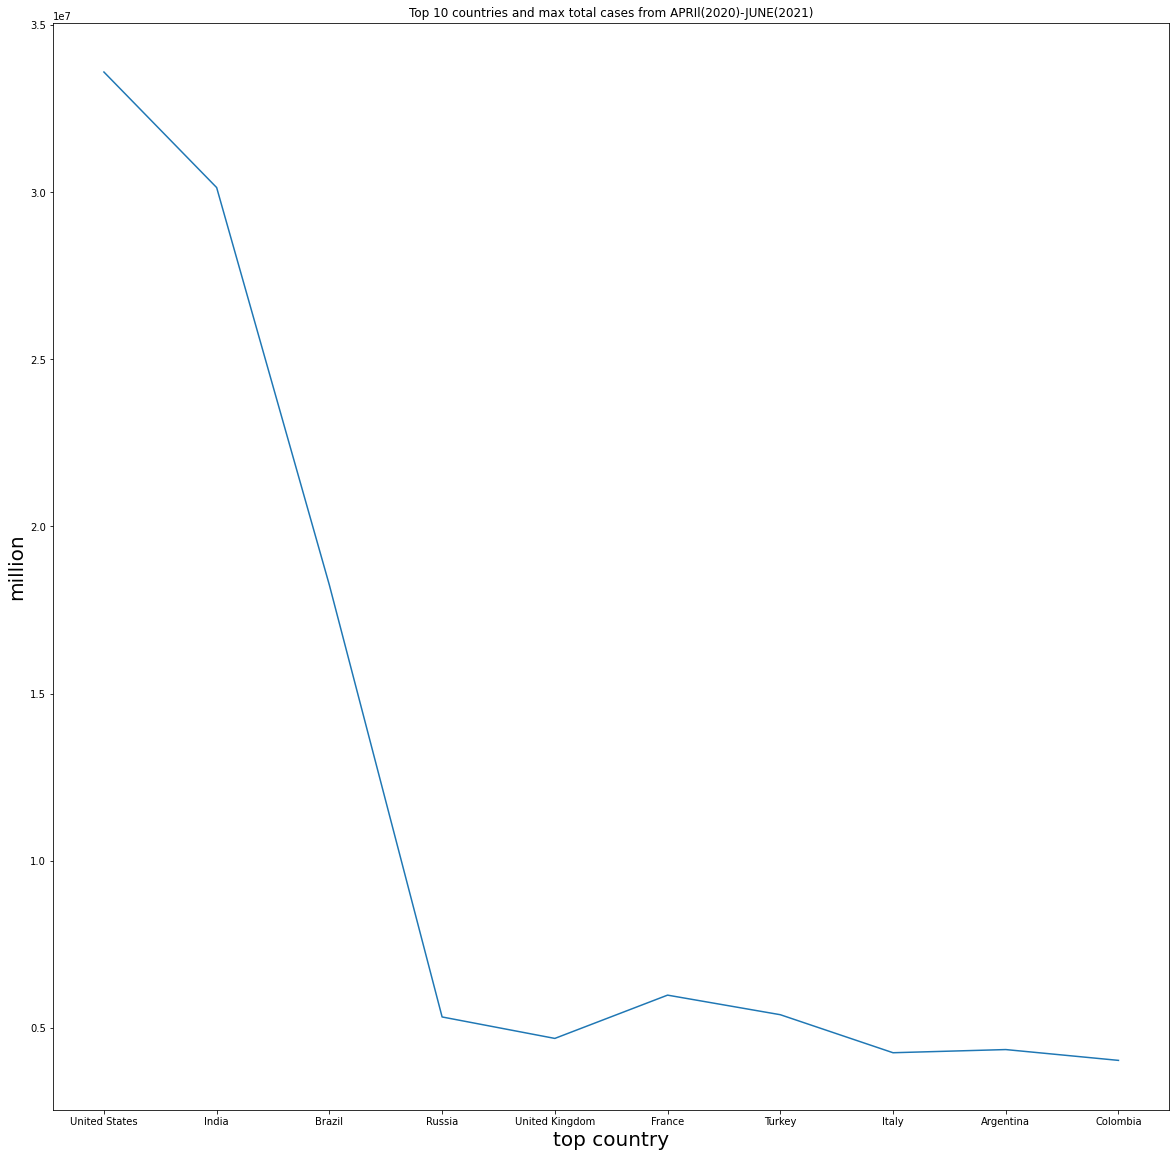

In [122]:
plt.figure(figsize=(20,20))
plt.plot(topcases,toploc)
plt.ylabel('million',fontsize=20)
plt.xlabel('top country',fontsize=20)
plt.title('Top 10 countries and max total cases from APRIl(2020)-JUNE(2021)')
plt.show()

Bottom

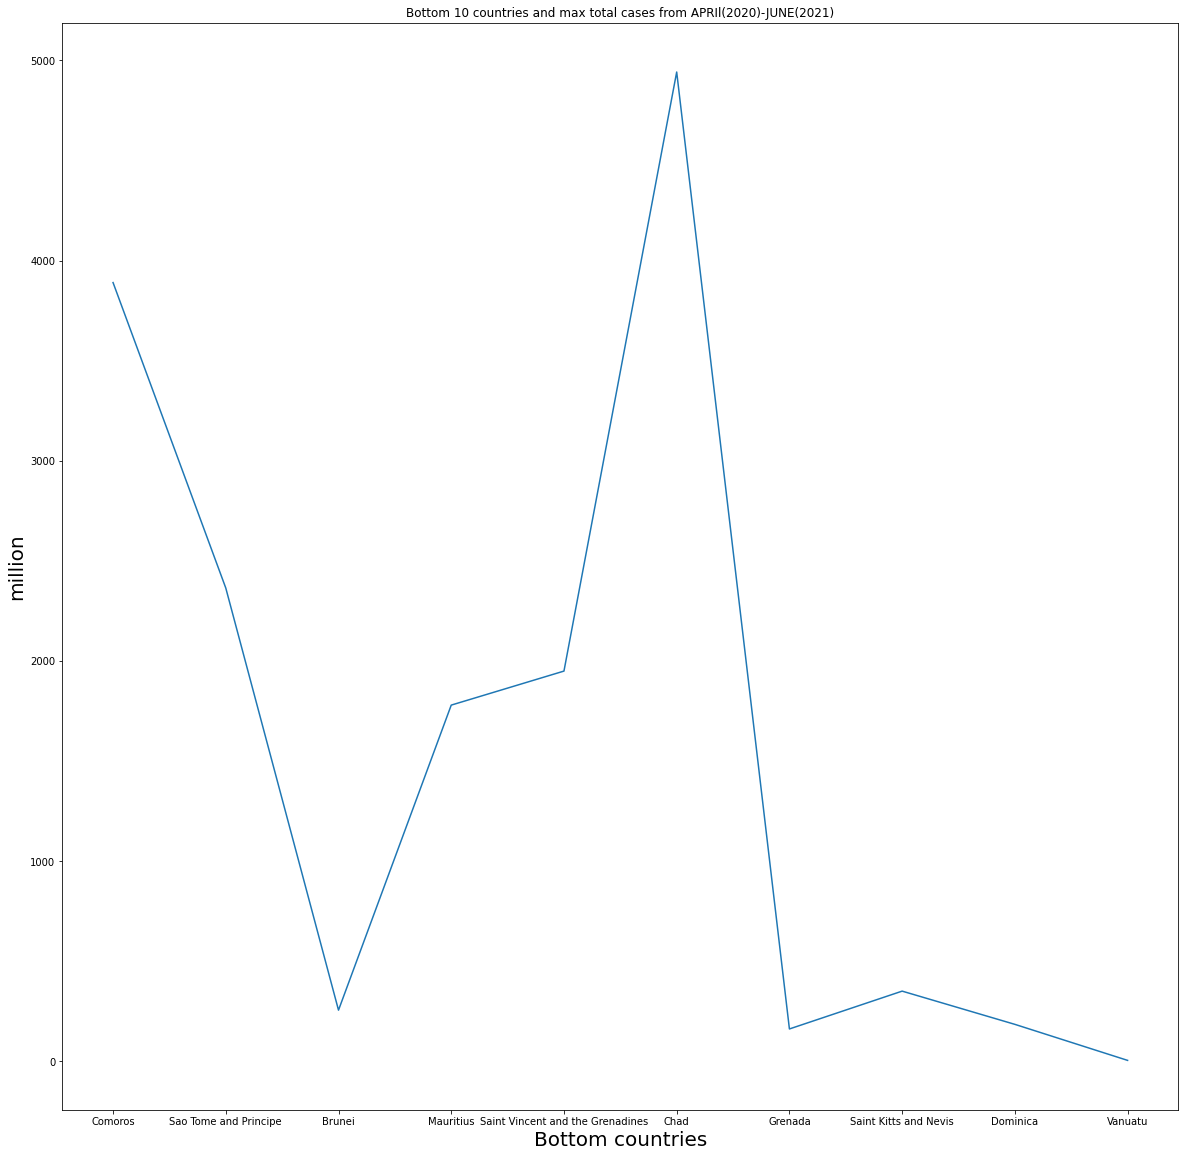

In [123]:
plt.figure(figsize=(20,20))
plt.plot(bottomloc,botdea)
plt.ylabel('million',fontsize=20)
plt.xlabel('Bottom countries',fontsize=20)
plt.title('Bottom 10 countries and max total cases from APRIl(2020)-JUNE(2021)')
plt.show()

# ***HEATMAP***

In [ ]:
corr=df1[['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'total_tests', 'people_vaccinated', 'people_fully_vaccinated',
       'new_vaccinations', 'stringency_index', 'population', 'gdp_per_capita',
       'life_expectancy', 'human_development_index']].corr()

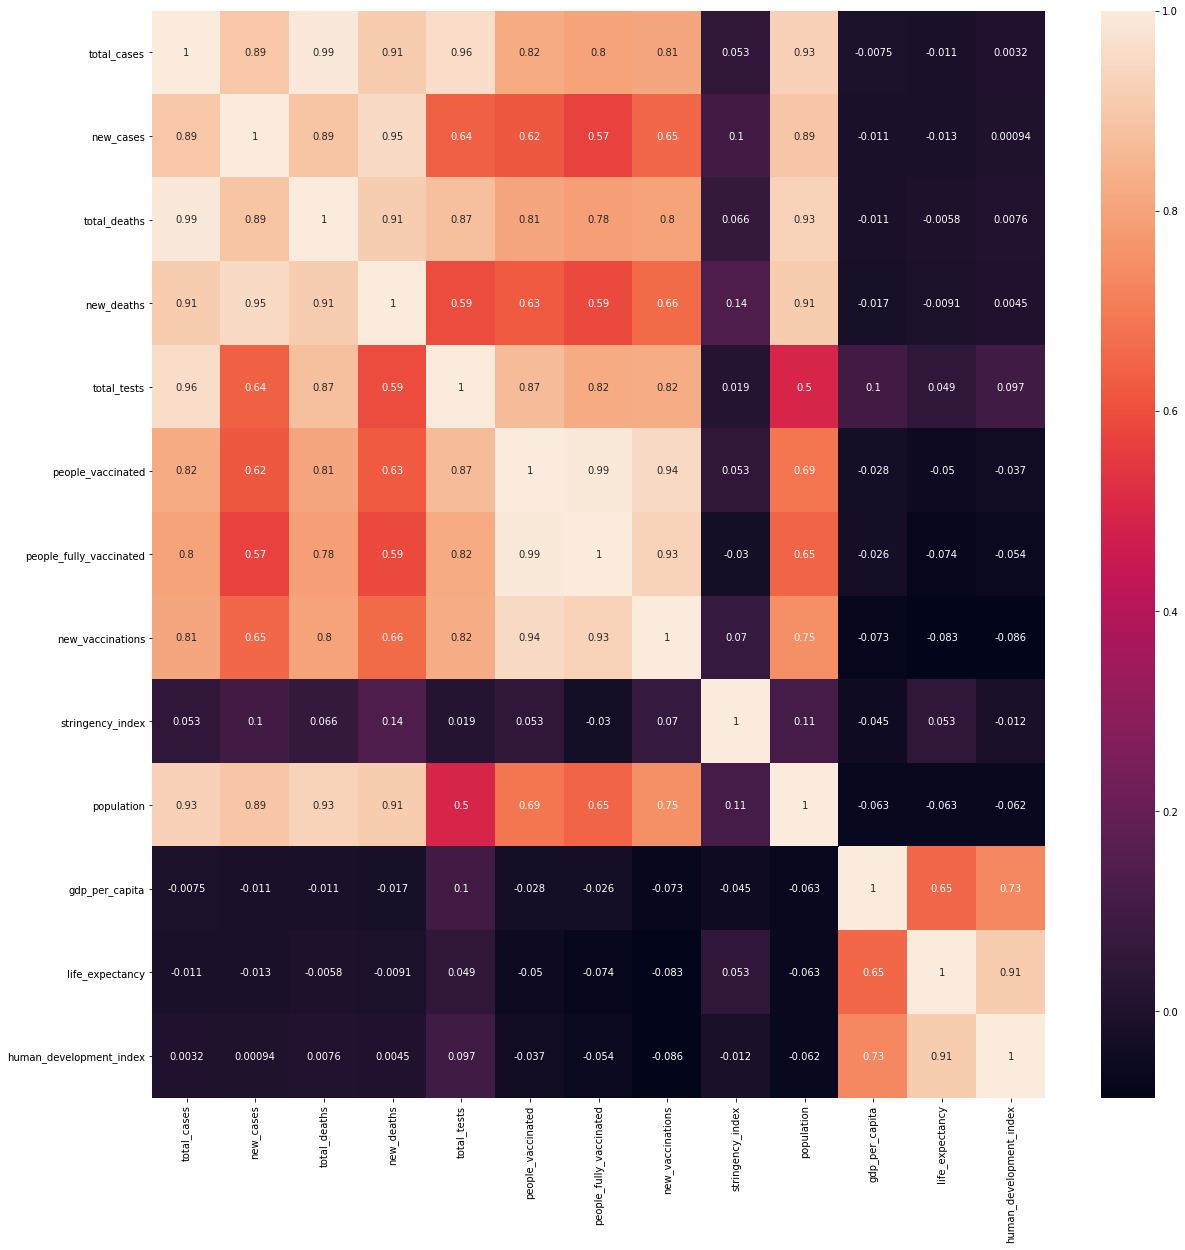

In [136]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
